# 2A.ml - Bayesian models with Python

Modèles de mélanges de lois. Statistiques bayésiennes. *bayespy*, *scikit-learn*.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

You can read [Probabilistic Programming and Bayesian Methods for Hackers](http://nbviewer.jupyter.org/github/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/blob/master/Prologue/Prologue.ipynb). Results might be different between examples. The example used is the same but the default parameters the optimisation uses are different.

We try different python model to deal with a Bayesian problem: a Gaussian Mixture. We will use the following example.

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

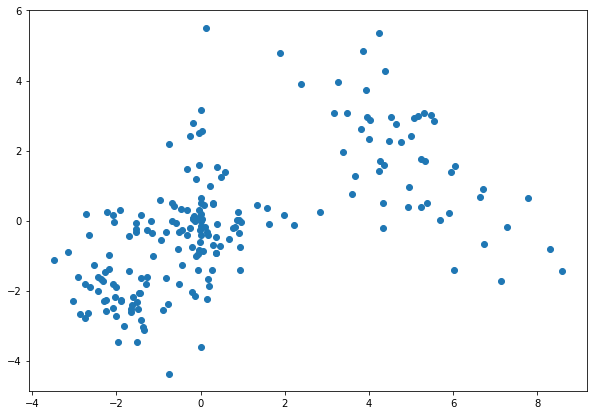

In [4]:
import numpy as np
y0 = np.random.multivariate_normal([0, 0], [[2, 0], [0, 0.1]], size=50)
y1 = np.random.multivariate_normal([0, 0], [[0.1, 0], [0, 2]], size=50)
y2 = np.random.multivariate_normal([5, 2], [[2, -1.5], [-1.5, 2]], size=50)
y3 = np.random.multivariate_normal([-2, -2], [[0.5, 0], [0, 0.5]], size=50)
y = np.vstack([y0, y1, y2, y3])
X=y

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(y[:,0], y[:,1], "o");

<h3 id="bayespy">bayespy</h3>

The module [bayespy](http://www.bayespy.org/) allows to build and estimate simple bayesian models. I just replicate the example on the [Gaussian mixture model](http://www.bayespy.org/examples/gmm.html).

We define the model:

In [5]:
from bayespy import __version__ as v1
from numpy import __version__ as v2
v1, v2

('0.5.22', '1.22.1')

Si cela ne marche pas avec la version 1.14 de numpy, vous devriez essayez la version 1.13 (a priori, cette [exception](https://github.com/numpy/numpy/blob/master/numpy/core/einsumfunc.py#L710) pose problème).

In [6]:
N = 200  # number of data vectors
D = 2    # dimension
K = 10   # maximum number of clusters

In [7]:
from bayespy.nodes import Dirichlet, Categorical, Gaussian, Wishart, Mixture
alpha = Dirichlet(1e-5*np.ones(K), name='alpha')
Z = Categorical(alpha, plates=(N,), name='z')
mu = Gaussian(np.zeros(D), 1e-5*np.identity(D), plates=(K,), name='mu')
sigma = Wishart(D, 1e-5*np.identity(D), plates=(K,), name='Lambda')
Y = Mixture(Z, Gaussian, mu, sigma, name='Y')

In [8]:
Z.initialize_from_random()

In [9]:
from bayespy.inference import VB
Q = VB(Y, mu, sigma, Z, alpha)

In [10]:
Y.observe(y)

In [11]:
import time
if not hasattr(time, 'clock'):
    # bayespy still clock and it was removed in python 3.8
    setattr(time, 'clock', time.perf_counter)

In [12]:
Q.update(repeat=1000)

Iteration 1: loglike=-1.497701e+03 (0.012 seconds)
Iteration 2: loglike=-1.359319e+03 (0.009 seconds)
Iteration 3: loglike=-1.345008e+03 (0.007 seconds)
Iteration 4: loglike=-1.333128e+03 (0.007 seconds)
Iteration 5: loglike=-1.321888e+03 (0.008 seconds)
Iteration 6: loglike=-1.308002e+03 (0.007 seconds)
Iteration 7: loglike=-1.290391e+03 (0.007 seconds)
Iteration 8: loglike=-1.275647e+03 (0.006 seconds)
Iteration 9: loglike=-1.264646e+03 (0.008 seconds)
Iteration 10: loglike=-1.251051e+03 (0.006 seconds)
Iteration 11: loglike=-1.229172e+03 (0.006 seconds)
Iteration 12: loglike=-1.182531e+03 (0.006 seconds)
Iteration 13: loglike=-1.162046e+03 (0.007 seconds)
Iteration 14: loglike=-1.129390e+03 (0.008 seconds)
Iteration 15: loglike=-1.114487e+03 (0.007 seconds)
Iteration 16: loglike=-1.089347e+03 (0.008 seconds)
Iteration 17: loglike=-1.086340e+03 (0.007 seconds)
Iteration 18: loglike=-1.083643e+03 (0.008 seconds)
Iteration 19: loglike=-1.080921e+03 (0.007 seconds)
Iteration 20: loglike

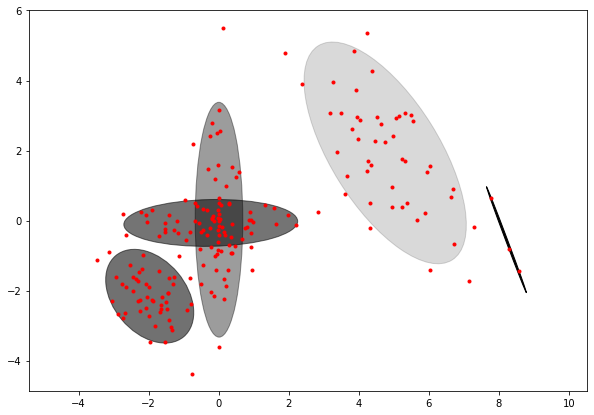

In [13]:
import bayespy.plot as bpplt
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
bpplt.gaussian_mixture_2d(Y, alpha=alpha, scale=2, color="black", fill=True, axes=ax)

We get the result of the optimization:

In [14]:
from bayespy.inference.vmp.nodes.gaussian import GaussianWishartMoments
parent = Y.parents[1]
(mu, _, sigma, _) = parent.get_moments()
mu, sigma

(array([[-1.36058471e-01, -5.54785591e-01],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 7.32146904e+00,  4.25483005e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 8.75857358e-02,  9.11669540e-03],
        [ 3.72250304e+04,  1.40121275e+04],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [-7.71374280e+00, -7.35395097e+00]]),
 array([[[ 6.52316512e-01, -1.63828746e-01],
         [-1.63828746e-01,  8.96234523e+00]],
 
        [[ 2.00000000e+05,  0.00000000e+00],
         [ 0.00000000e+00,  2.00000000e+05]],
 
        [[ 2.00000000e+05,  0.00000000e+00],
         [ 0.00000000e+00,  2.00000000e+05]],
 
        [[ 1.28998747e+00,  6.13731151e-01],
         [ 6.13731151e-01,  6.90986759e-01]],
 
        [[ 2.00000000e+05,  0.00000000e+00],
         [ 0.00000000e+00,  2.00000000e+05]],
 
        [[ 8.65297348e+00,  9.29871380e-03],
         [ 9.29871380e-03,  3.55806853e-01]],
 


In [15]:
import numpy as np
mu2 = np.linalg.solve(sigma, mu)
mu2

array([[-0.22515766, -0.06601764],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 4.75563304,  1.93368381],
       [ 0.        ,  0.        ],
       [ 0.01009479,  0.02535878],
       [ 8.21785907, -0.54595493],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-1.96797779, -2.158508  ]])

The way you can build your model is quite nice but it still needs some development. scikit-learn proposes a better interface.

<h3 id="scikit">scikit-learn</h3>

We try to solve the same problem with another module: [scikit-learn](http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm.html#example-mixture-plot-gmm-py).

In [16]:
from sklearn import mixture
gmm = mixture.GaussianMixture (n_components=10, covariance_type='full')
gmm.fit(X)

GaussianMixture(n_components=10)

In [17]:
dpgmm = mixture.BayesianGaussianMixture(n_components=10, covariance_type='full')
dpgmm.fit(X)

BayesianGaussianMixture(n_components=10)

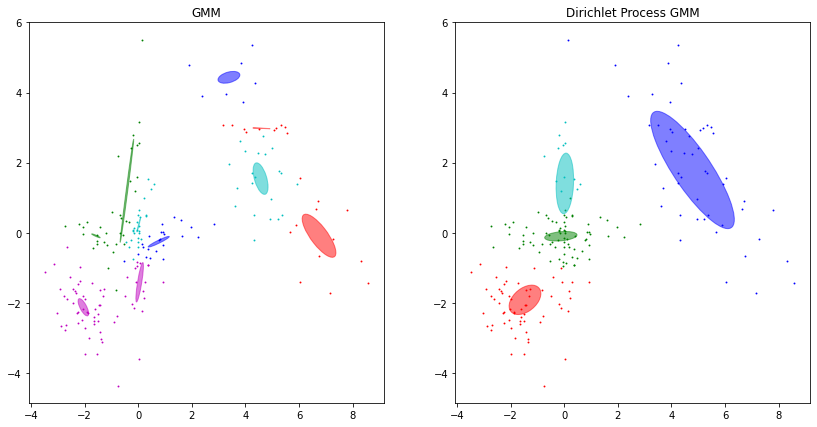

In [18]:
import itertools
import matplotlib as mpl
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm'])
f, axarr = plt.subplots(1, 2, figsize=(14,7))

for i, (clf, title) in enumerate([(gmm, 'GMM'),
                                  (dpgmm, 'Dirichlet Process GMM')]):
    splot = axarr[i]
    Y_ = clf.predict(X)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf.covariances_, color_iter)):
        v, w = np.linalg.eigh(covar)
        u = w[0] / np.linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        splot.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 0.8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)
        splot.set_title(title)